# **Implementing Linear Regression with Scikit-learn**

---

This chapter demonstrates how to use the Scikit-learn library to implement Linear Regression efficiently, leveraging its built-in tools for training, prediction, and evaluation.

---

### **Step 1: Setting Up the Environment**

If Scikit-learn is not already installed, you can install it using:

```bash
pip install scikit-learn
```

---

### **Step 2: Loading the Synthetic Dataset**

We’ll reuse the synthetic dataset generated earlier to demonstrate Linear Regression with Scikit-learn.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

### **Step 3: Training a Linear Regression Model**

The `LinearRegression` class in Scikit-learn simplifies model training.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Create a Linear Regression model
lin_reg = LinearRegression()

In [6]:
# Train the model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
# Display the learned parameters
print("Intercept (θ0):", lin_reg.intercept_)
print("Coefficients (θ1):", lin_reg.coef_)

Intercept (θ0): [4.14291332]
Coefficients (θ1): [[2.79932366]]


---

### **Step 4: Making Predictions**

Use the trained model to predict target values for the test set.

In [8]:
# Predict target values
y_pred = lin_reg.predict(X_test)

In [9]:
print("Predictions:", y_pred[:5])  # Display the first 5 predictions

Predictions: [[4.49875411]
 [9.15273606]
 [8.46643942]
 [7.85214193]
 [5.59173117]]


---

### **Step 5: Evaluating the Model**

Evaluate the model using common metrics like **Mean Squared Error (MSE)** and **R-squared (R²)**.

#### **MSE Calculation**

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.6536995137170021


---

#### **R-squared Calculation**

In [12]:
from sklearn.metrics import r2_score

In [13]:
# Compute R²
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

R-squared (R²): 0.8072059636181392


---

### **Step 6: Visualizing Results**

Plot the regression line along with the test data points to visualize the model's performance.

In [14]:
import matplotlib.pyplot as plt

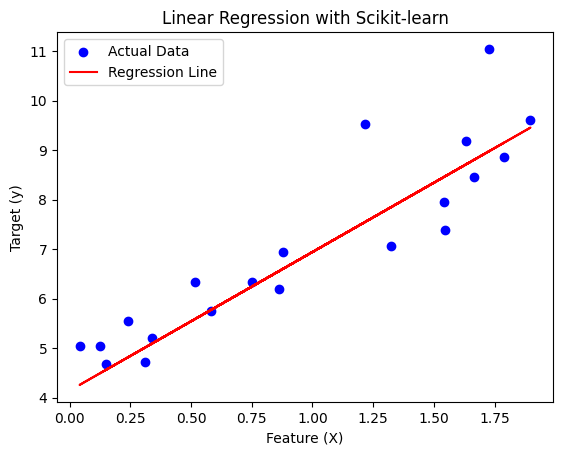

In [15]:
# Plot the data and regression line
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression with Scikit-learn")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

---

### **Step 7: Feature Scaling**

Scikit-learn automatically handles the bias term, so feature scaling is optional for Linear Regression. However, scaling becomes essential for models like Ridge and Lasso, which we’ll explore in later chapters.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Retrain the model with scaled features
lin_reg.fit(X_train_scaled, y_train)
y_pred_scaled = lin_reg.predict(X_test_scaled)

In [19]:
print("Scaled MSE:", mean_squared_error(y_test, y_pred_scaled))

Scaled MSE: 0.653699513717002


---

### **Step 8: Advanced Use Case: Polynomial Features**

Linear Regression can model non-linear relationships by adding polynomial features.

<img src='images/PolynomialRegression.png'>

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [22]:
# Split polynomial data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [23]:
# Train Linear Regression on polynomial features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

In [24]:
# Predict and evaluate
y_pred_poly = lin_reg_poly.predict(X_test_poly)
print("Polynomial MSE:", mean_squared_error(y_test_poly, y_pred_poly))
print("Polynomial R²:", r2_score(y_test_poly, y_pred_poly))

Polynomial MSE: 0.6358406072820808
Polynomial R²: 0.8124730482414345


---

### **Step 9: Comparing Normal Equation, Gradient Descent, and Scikit-learn**

All three methods should yield similar results when implemented correctly. Scikit-learn is generally preferred for real-world applications due to its:
1. **Ease of Use**: Simple APIs for training, predicting, and evaluating.
2. **Efficiency**: Optimized implementations.
3. **Extensibility**: Support for advanced techniques like regularization and pipelines.

In [25]:
print("Parameters (Scikit-learn):")
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Parameters (Scikit-learn):
Intercept: [6.76363207]
Coefficients: [[1.63051407]]


<img src='images/NormalEquatio.png'>
<img src='images/Contour-plot.png'>
<img src='images/CostFunction.png'>

---

### **Key Takeaways**
1. Scikit-learn simplifies Linear Regression with its `LinearRegression` class.
2. Model evaluation metrics like MSE and R² help assess performance.
3. Feature scaling is optional but useful for regularization and complex models.
4. Polynomial features allow Linear Regression to handle non-linear relationships.

---
---

## Feature Scaling
### Why Feature Scaling is Important:
Feature scaling ensures that features contribute equally to the model by standardizing or normalizing their ranges. This is particularly important for algorithms like Gradient Descent, Support Vector Machines, and K-Means Clustering.

### Resources:
1. **[Feature Scaling in Machine Learning - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)**  
   Covers normalization, standardization, and other scaling techniques with practical applications.

2. **[Khan Academy - Machine Learning](https://www.khanacademy.org/math/statistics-probability)**  
   Offers foundational concepts of data preprocessing, including feature scaling.

---

## Polynomial Features
### Why Use Polynomial Features:
Polynomial features enable linear models to fit nonlinear relationships by transforming the input features into polynomial terms.

### Resources:
1. **[Polynomial Regression - GeeksforGeeks](https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/)**
   A detailed explanation of polynomial regression with Python implementation.

2. **[Polynomial Features - Scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)**  
   Official Scikit-learn documentation explaining the `PolynomialFeatures` class with examples.

3. **[Polynomial Regression - Towards Data Science](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)**  
   Introduces polynomial regression and discusses its application with visualizations.